In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('dataset/events_complete.csv')
df.columns = map(str.lower, df.columns)

## Dataset distribution

The histogram below shows the distribution of the ICU stays. It can be seen that most of the samples are 8-day ICU stays and there are only few 2-day ICU stays.

<AxesSubplot:xlabel='Length of ICU stay (days)', ylabel='count'>

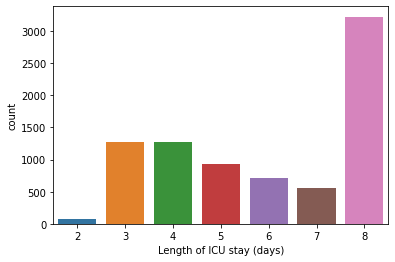

In [2]:
groups = df.groupby('stay_id').apply(lambda group: len(group))
sns.countplot(pd.Series(groups, name='Length of ICU stay (days)'))

## AKI distribution

The bar chart below compares the number of ICU stays and how many of them had next-day AKI.

<AxesSubplot:xlabel='los', ylabel='count'>

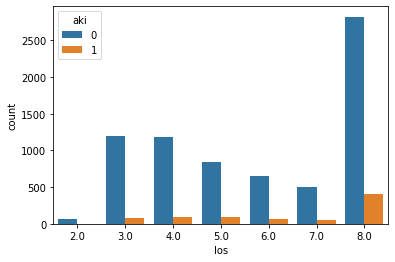

In [3]:
# get the last day predictions of each ICU stays
last_day_preds = pd.pivot_table(df, index='stay_id', values='aki', aggfunc=lambda x: x.iloc[-1])
# get the length of stay of each ICU stays
los = pd.pivot_table(df, index='stay_id', values='aki', aggfunc=len)

aki_los = pd.concat([last_day_preds, los], axis=1)
aki_los.columns = ['aki', 'los']
aki_los['aki'] = aki_los['aki'].astype('int')

sns.countplot(x='los', hue='aki', data=aki_los)

The graph below shows the number of positive ICU stays for each length of stays.

<AxesSubplot:xlabel='los', ylabel='count'>

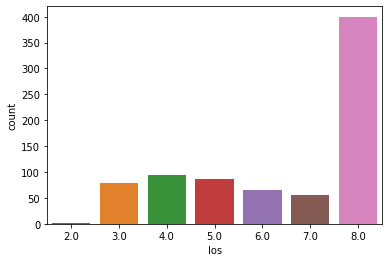

In [4]:
los_positives = aki_los[aki_los['aki'] == 1]
sns.countplot(x='los', data=los_positives)